In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1 = open(r'NER_train.json' , 'r' , encoding='utf-8')
f2 = open(r'NER_test.json' , 'r' , encoding='utf-8')
f3 = open(r'NER_val.json' , 'r' , encoding='utf-8')

train_data = list(json.load(f1).values())
test_data = list(json.load(f2).values())
val_data = list(json.load(f3).values())


f1.close()
f2.close()
f3.close()

In [3]:
texts = []

for i in train_data + test_data + val_data:
    texts.append(i['text'])

texts

['Therefore while interpreting statutory provisions the courts should keep in mind the objectives or purpose for which statute has been enacted',
 'The petitioner in W P No 15821 of 2008 was never considered for appointment under the National Rural Employment Guarantee Scheme either through Employment Exchange sponsorship or by Outsourcing Agencies',
 'The factum of accident allegation of rash and negligent driving causing death of Sukendra Pal Singh were denied',
 '36 W A No 655 2012 others Meaning thereby that except interview by the Commission entire procedure for recruitment as emergency appointment was followed',
 'The law on this issue is well settled and the law is that though the provisions of Evidence Act are not applicable but in a given situation the help of the principles of Evidence Act in the proceedings before the assessing authorities can be taken',
 'Mr Ved Prakash learned Counsel appearing in Writ Petition No 3457 2000 submitted that the interpretation of RPSC of Rule

In [4]:
# Tokenizing the text & converting each word of the sentence to an index in the vocabulary

from keras.preprocessing.text import Tokenizer


In [5]:
Tokenizer = Tokenizer(lower=False)
Tokenizer.fit_on_texts(texts)

sequences = Tokenizer.texts_to_sequences(texts)

sequences

[[419,
  258,
  3752,
  560,
  114,
  1,
  1048,
  152,
  2628,
  5,
  747,
  1,
  6389,
  28,
  324,
  12,
  24,
  748,
  19,
  35,
  1126],
 [15,
  78,
  5,
  73,
  31,
  18,
  8089,
  2,
  316,
  9,
  1153,
  294,
  12,
  849,
  20,
  1,
  850,
  3753,
  3182,
  6390,
  2078,
  524,
  343,
  3182,
  2361,
  8090,
  28,
  10,
  8091,
  8092],
 [15,
  4136,
  2,
  544,
  1839,
  2,
  2793,
  4,
  2267,
  1296,
  1731,
  474,
  2,
  11411,
  1238,
  55,
  42,
  641],
 [966,
  73,
  48,
  18,
  11412,
  321,
  327,
  8093,
  1567,
  6,
  948,
  4137,
  10,
  1,
  479,
  792,
  764,
  12,
  2629,
  13,
  8094,
  849,
  9,
  704],
 [15,
  95,
  11,
  27,
  373,
  8,
  281,
  692,
  4,
  1,
  95,
  8,
  6,
  319,
  1,
  114,
  2,
  899,
  23,
  41,
  17,
  576,
  92,
  5,
  7,
  173,
  1212,
  1,
  1524,
  2,
  1,
  607,
  2,
  899,
  23,
  5,
  1,
  237,
  66,
  1,
  2156,
  683,
  118,
  14,
  131],
 [128,
  6391,
  1239,
  62,
  412,
  642,
  5,
  366,
  379,
  18,
  11413,
  459,
  186

In [6]:
# extracting all the labels 

labels = []
max_sentence_length = 0

for i in train_data + test_data + val_data:
    for j in i['labels']:
        max_sentence_length = max(max_sentence_length , len(i['text'].split(' ')))
        if j not in labels:
            labels.append(j)

labels.append('UNKNNOWN')
labels.sort()

labels 

['B_CASE_NUMBER',
 'B_COURT',
 'B_DATE',
 'B_GPE',
 'B_JUDGE',
 'B_ORG',
 'B_OTHER_PERSON',
 'B_PETITIONER',
 'B_PRECEDENT',
 'B_PROVISION',
 'B_RESPONDENT',
 'B_STATUTE',
 'B_WITNESS',
 'I_CASE_NUMBER',
 'I_COURT',
 'I_DATE',
 'I_GPE',
 'I_JUDGE',
 'I_ORG',
 'I_OTHER_PERSON',
 'I_PETITIONER',
 'I_PRECEDENT',
 'I_PROVISION',
 'I_RESPONDENT',
 'I_STATUTE',
 'I_WITNESS',
 'O',
 'UNKNNOWN']

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)

label_encoder.classes_

array(['B_CASE_NUMBER', 'B_COURT', 'B_DATE', 'B_GPE', 'B_JUDGE', 'B_ORG',
       'B_OTHER_PERSON', 'B_PETITIONER', 'B_PRECEDENT', 'B_PROVISION',
       'B_RESPONDENT', 'B_STATUTE', 'B_WITNESS', 'I_CASE_NUMBER',
       'I_COURT', 'I_DATE', 'I_GPE', 'I_JUDGE', 'I_ORG', 'I_OTHER_PERSON',
       'I_PETITIONER', 'I_PRECEDENT', 'I_PROVISION', 'I_RESPONDENT',
       'I_STATUTE', 'I_WITNESS', 'O', 'UNKNNOWN'], dtype='<U14')

In [8]:
label_encoder.transform(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [9]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [10]:
def preprocess_data(data, Tokenizer, LabelEncoder):
    global max_sentence_length
    
    texts = []
    for i in data:
        texts.append(i['text'])

    x = Tokenizer.texts_to_sequences(texts)
    x = pad_sequences(x, maxlen=max_sentence_length, padding='post')


    y = [[label if label in LabelEncoder.classes_ else 'UNKNOWN' for label in item['labels']] for item in data]
    y = [LabelEncoder.transform(sublist).tolist() for sublist in y]
    y = pad_sequences(y, maxlen=max_sentence_length, padding='post')
    y = to_categorical(y, num_classes=len(LabelEncoder.classes_))
    
    return x, y

In [11]:
x_train , y_train = preprocess_data(train_data , Tokenizer , label_encoder)
x_val , y_val = preprocess_data(val_data , Tokenizer , label_encoder)
x_test , y_test = preprocess_data(test_data , Tokenizer , label_encoder)

In [12]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((8019, 96),
 (8019, 96, 28),
 (1416, 96),
 (1416, 96, 28),
 (949, 96),
 (949, 96, 28))

In [13]:
Tokenizer.word_index

{'the': 1,
 'of': 2,
 'to': 3,
 'and': 4,
 'in': 5,
 'that': 6,
 'a': 7,
 'is': 8,
 'was': 9,
 'by': 10,
 'on': 11,
 'for': 12,
 'as': 13,
 'be': 14,
 'The': 15,
 'Court': 16,
 'not': 17,
 'No': 18,
 'has': 19,
 'under': 20,
 'it': 21,
 '1': 22,
 'Act': 23,
 'which': 24,
 'case': 25,
 'with': 26,
 'this': 27,
 'or': 28,
 'Section': 29,
 'at': 30,
 'P': 31,
 'from': 32,
 'In': 33,
 '2': 34,
 'been': 35,
 'an': 36,
 'State': 37,
 'his': 38,
 'v': 39,
 'had': 40,
 'are': 41,
 'were': 42,
 'he': 43,
 'also': 44,
 's': 45,
 'have': 46,
 'no': 47,
 'A': 48,
 '3': 49,
 'C': 50,
 'accused': 51,
 'any': 52,
 'It': 53,
 'order': 54,
 'Singh': 55,
 'dated': 56,
 'High': 57,
 'made': 58,
 'said': 59,
 'Supreme': 60,
 '4': 61,
 'learned': 62,
 'India': 63,
 'would': 64,
 'held': 65,
 'before': 66,
 'appellant': 67,
 '5': 68,
 'I': 69,
 'respondent': 70,
 'other': 71,
 'against': 72,
 'W': 73,
 'S': 74,
 'there': 75,
 'such': 76,
 'who': 77,
 'petitioner': 78,
 'filed': 79,
 'decision': 80,
 'J': 81

In [14]:
import gensim.downloader as api

w2v_embeddings = {}
fasttext_embeddings = {}
glove_embeddings = {}

f1 = open(r'C:\Users\Utkarsh Venaik\Desktop\sem6\NLP\NLP_A2\Embeddings\fasttext_embeddings.vec' , 'r' , encoding='utf-8')
f2 = open(r'C:\Users\Utkarsh Venaik\Desktop\sem6\NLP\NLP_A2\Embeddings\fasttext_embeddings.vec' , 'r' , encoding='utf-8')

def load_embedding(str , fd):
    if str == "w2v":
        w2v_embeddings = api.load("word2vec-google-news-300")
        return 
    elif str == "fasttext":
        next(fd)
    for i in fd:
        values = i.rstrip().split(' ')
        try:
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            if str == "fasttext":
                fasttext_embeddings[word] = vector
            else:
                glove_embeddings[word] = vector
        except:
            continue
        

load_embedding("w2v" , None)
load_embedding("fasttext" , f1)
load_embedding("glove" , f2)

f1.close()
f2.close()

w2v_embeddings = api.load("word2vec-google-news-300")

In [15]:
len(w2v_embeddings) , len(fasttext_embeddings) , len(glove_embeddings)

(3000000, 2000000, 2000000)

In [16]:
vocab_size = len(Tokenizer.word_index) + 1
embedding_dimension = 300 # hardcoded for each of the embeddings by the creator 

embedding_matrix_w2v = np.zeros((vocab_size , embedding_dimension))
embedding_matrix_fasttext = np.zeros((vocab_size , embedding_dimension))
embedding_matrix_glove = np.zeros((vocab_size , embedding_dimension))

print(embedding_matrix_w2v.shape , embedding_matrix_fasttext.shape , embedding_matrix_glove.shape)

(23211, 300) (23211, 300) (23211, 300)


In [17]:
for i , j in Tokenizer.word_index.items():
    if i in w2v_embeddings:
        embedding_matrix_w2v[j] = w2v_embeddings[i]
    if i in fasttext_embeddings:
        embedding_matrix_fasttext[j] = fasttext_embeddings[i]
    if i in glove_embeddings:
        embedding_matrix_glove[j] = glove_embeddings[i]

In [33]:
texts[0:5]

['Therefore while interpreting statutory provisions the courts should keep in mind the objectives or purpose for which statute has been enacted',
 'The petitioner in W P No 15821 of 2008 was never considered for appointment under the National Rural Employment Guarantee Scheme either through Employment Exchange sponsorship or by Outsourcing Agencies',
 'The factum of accident allegation of rash and negligent driving causing death of Sukendra Pal Singh were denied',
 '36 W A No 655 2012 others Meaning thereby that except interview by the Commission entire procedure for recruitment as emergency appointment was followed',
 'The law on this issue is well settled and the law is that though the provisions of Evidence Act are not applicable but in a given situation the help of the principles of Evidence Act in the proceedings before the assessing authorities can be taken']

MODEL IMPLEMENTATION

In [34]:
ctr = 0

def plot_graph(model , embedding_name , model_type , i_graph):
    global ctr 
    ctr+=1
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title(f'{model_type} model accuracy using {embedding_name} embeddings')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])


    plt.subplot(1, 3, 2)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title(f'{model_type} model loss using {embedding_name} embeddings')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])

    if i_graph == 0:
        recall_train = model.history[f'recall']
        precision_train = model.history['precision']
        recall_val = model.history[f'val_recall']
        precision_val = model.history['val_precision']        
    else :
        recall_train = model.history[f'recall_{i_graph}']
        precision_train = model.history[f'precision_{i_graph}']
        recall_val = model.history[f'val_recall_{i_graph}']
        precision_val = model.history[f'val_precision_{i_graph}']

        
    f1_train = []
    for i in range(len(recall_train)):
        f1_train.append(2 * (precision_train[i] * recall_train[i]) / (precision_train[i] + recall_train[i]))
    
    f1_val = []
    for i in range(len(recall_val)):
        f1_val.append(2 * (precision_val[i] * recall_val[i]) / (precision_val[i] + recall_val[i]))

    plt.subplot(1, 3, 3)
    plt.plot(f1_train)
    plt.plot(f1_val)
    plt.title(f'{model_type} model f1 score using {embedding_name} embeddings')
    plt.ylabel('f1 score')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.yticks([])
    

    plt.show()



In [35]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, TimeDistributed, Bidirectional
from keras.optimizers import Adam
from sklearn.metrics import f1_score

In [36]:
i_graph = 0 

#1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 300)           6963300   
                                                                 
 simple_rnn (SimpleRNN)      (None, 96, 100)           40100     
                                                                 
 time_distributed (TimeDist  (None, 96, 28)            2828      
 ributed)                                                        
                                                                 
Total params: 7006228 (26.73 MB)
Trainable params: 42928 (167.69 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 4s 12ms/step - loss: 0.4841 - accuracy: 0.8914 - precision: 0.9544 - recall: 0.8372 - val_loss: 0.2424 - val_accuracy: 0.9367 - val_precision: 0.9713 - v

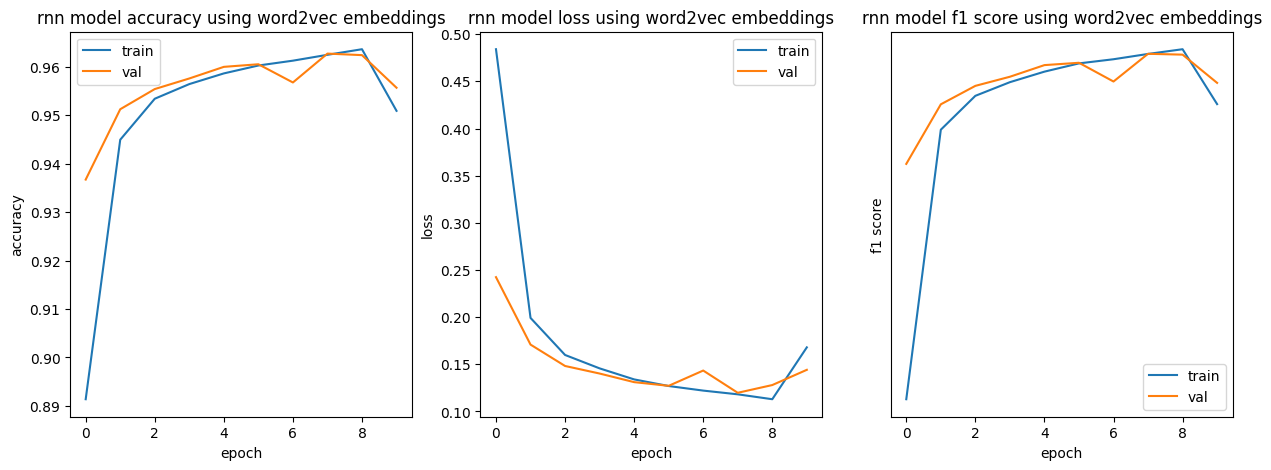

INFO:tensorflow:Assets written to: t1_model1_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t1_model1_word2vec.pkl\assets


#2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 lstm (LSTM)                 (None, 96, 100)           160400    
                                                                 
 time_distributed_1 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7126528 (27.19 MB)
Trainable params: 163228 (637.61 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 8s 27ms/step - loss: 0.4945 - accuracy: 0.8942 - precision_1: 0.9433 - recall_1: 0.8353 - val_loss: 0.2400 - val_accuracy: 0.9347 - val_precision_1: 0

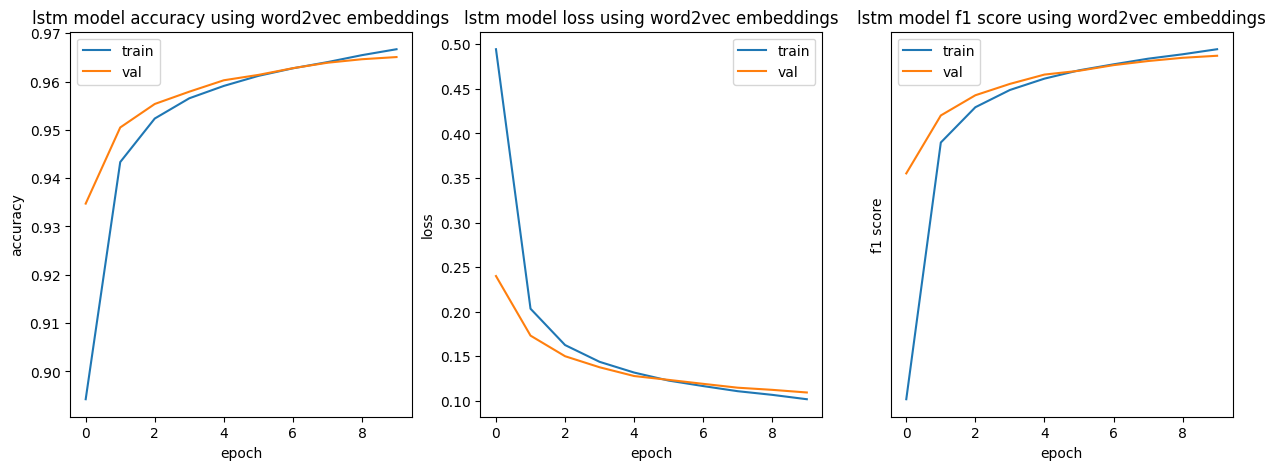

INFO:tensorflow:Assets written to: t1_model2_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t1_model2_word2vec.pkl\assets


#3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 gru (GRU)                   (None, 96, 100)           120600    
                                                                 
 time_distributed_2 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7086728 (27.03 MB)
Trainable params: 123428 (482.14 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 8s 25ms/step - loss: 0.5439 - accuracy: 0.9102 - precision_2: 0.9478 - recall_2: 0.8213 - val_loss: 0.2226 - val_accuracy: 0.9385 - val_precision_2: 0

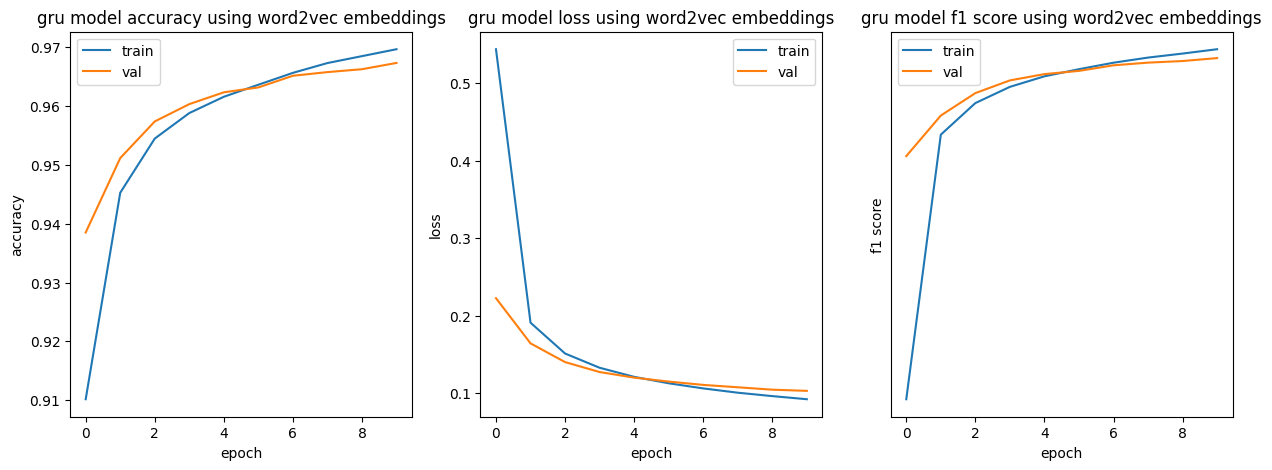

INFO:tensorflow:Assets written to: t1_model3_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t1_model3_word2vec.pkl\assets


#4
Epoch 1/20
251/251 [==============================] - 11s 36ms/step - loss: 0.4215 - accuracy: 0.9235 - precision_3: 0.9592 - recall_3: 0.8663 - val_loss: 0.1592 - val_accuracy: 0.9574 - val_precision_3: 0.9797 - val_recall_3: 0.9390
Epoch 2/20
251/251 [==============================] - 9s 35ms/step - loss: 0.1320 - accuracy: 0.9627 - precision_3: 0.9801 - recall_3: 0.9489 - val_loss: 0.1086 - val_accuracy: 0.9688 - val_precision_3: 0.9824 - val_recall_3: 0.9576
Epoch 3/20
251/251 [==============================] - 8s 33ms/step - loss: 0.0999 - accuracy: 0.9710 - precision_3: 0.9827 - recall_3: 0.9617 - val_loss: 0.0919 - val_accuracy: 0.9724 - val_precision_3: 0.9821 - val_recall_3: 0.9653
Epoch 4/20
251/251 [==============================] - 8s 33ms/step - loss: 0.0856 - accuracy: 0.9747 - precision_3: 0.9839 - recall_3: 0.9675 - val_loss: 0.0814 - val_accuracy: 0.9757 - val_precision_3: 0.9845 - val_recall_3: 0.9689
Epoch 5/20
251/251 [==============================] - 8s 33ms/st

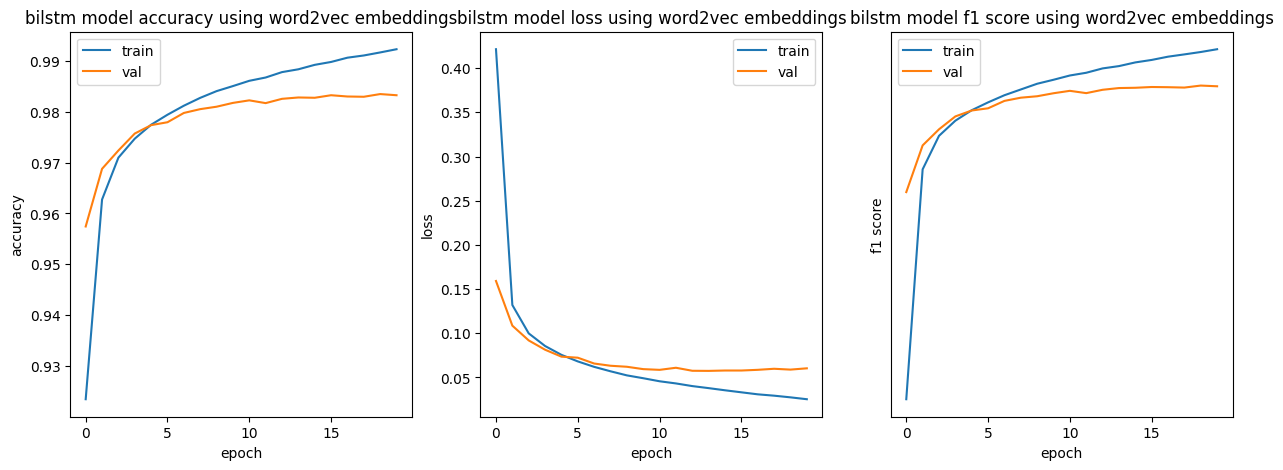

INFO:tensorflow:Assets written to: t1_model4_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t1_model4_word2vec.pkl\assets


#5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 96, 100)           40100     
                                                                 
 time_distributed_4 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7006228 (26.73 MB)
Trainable params: 42928 (167.69 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 5s 16ms/step - loss: 0.4807 - accuracy: 0.8897 - precision_4: 0.9532 - recall_4: 0.8464 - val_loss: 0.2422 - val_accuracy: 0.9409 - val_precision_4: 0.

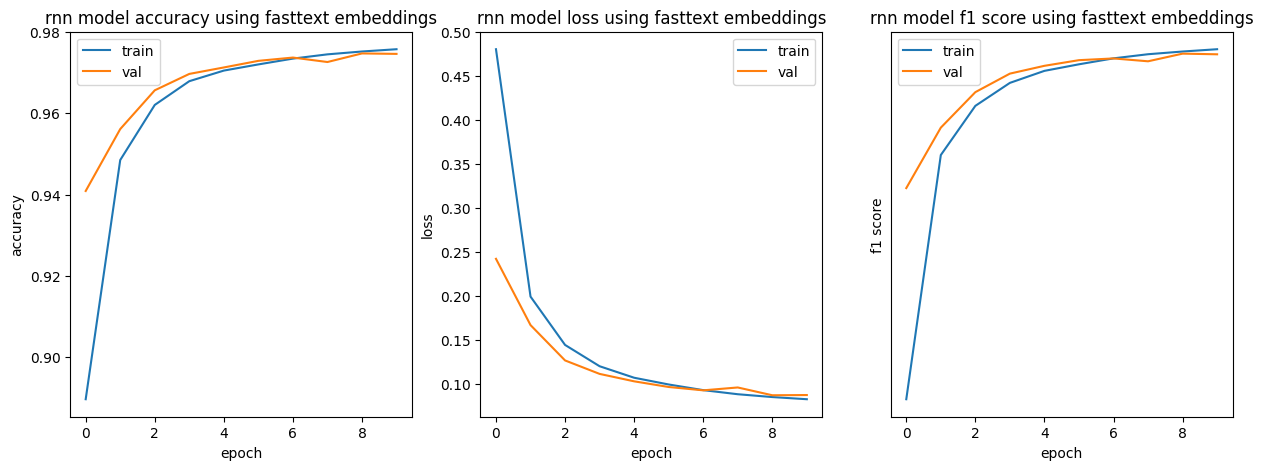

INFO:tensorflow:Assets written to: t1_model1_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t1_model1_fasttext.pkl\assets


#6
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 lstm_2 (LSTM)               (None, 96, 100)           160400    
                                                                 
 time_distributed_5 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7126528 (27.19 MB)
Trainable params: 163228 (637.61 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 11s 35ms/step - loss: 0.5360 - accuracy: 0.9077 - precision_5: 0.9428 - recall_5: 0.8237 - val_loss: 0.2592 - val_accuracy: 0.9392 - val_precision_5: 

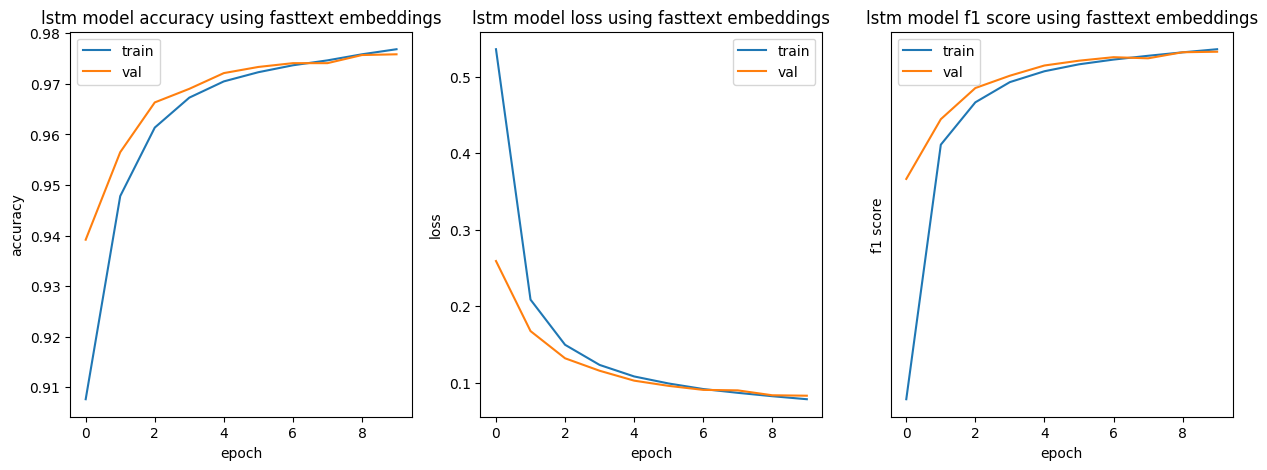

INFO:tensorflow:Assets written to: t1_model2_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t1_model2_fasttext.pkl\assets


#7
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 gru_1 (GRU)                 (None, 96, 100)           120600    
                                                                 
 time_distributed_6 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7086728 (27.03 MB)
Trainable params: 123428 (482.14 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 8s 25ms/step - loss: 0.5460 - accuracy: 0.9246 - precision_6: 0.9589 - recall_6: 0.8262 - val_loss: 0.2290 - val_accuracy: 0.9429 - val_precision_6: 0

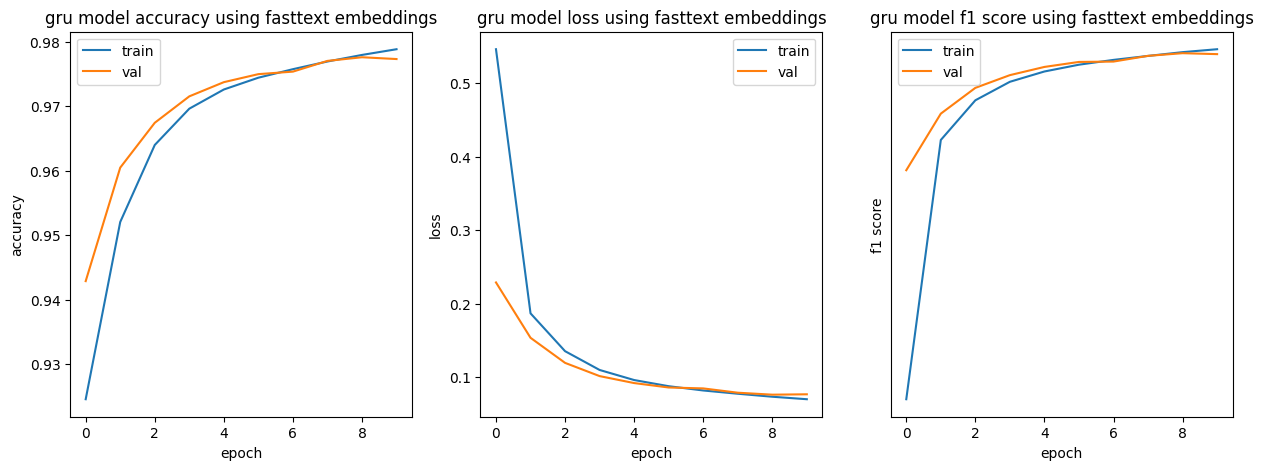

INFO:tensorflow:Assets written to: t1_model3_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t1_model3_fasttext.pkl\assets


#8
Epoch 1/20
251/251 [==============================] - 12s 36ms/step - loss: 0.4290 - accuracy: 0.9145 - precision_7: 0.9568 - recall_7: 0.8647 - val_loss: 0.1672 - val_accuracy: 0.9563 - val_precision_7: 0.9838 - val_recall_7: 0.9371
Epoch 2/20
251/251 [==============================] - 9s 35ms/step - loss: 0.1306 - accuracy: 0.9647 - precision_7: 0.9847 - recall_7: 0.9496 - val_loss: 0.1043 - val_accuracy: 0.9714 - val_precision_7: 0.9869 - val_recall_7: 0.9588
Epoch 3/20
251/251 [==============================] - 9s 37ms/step - loss: 0.0959 - accuracy: 0.9726 - precision_7: 0.9864 - recall_7: 0.9620 - val_loss: 0.0857 - val_accuracy: 0.9757 - val_precision_7: 0.9878 - val_recall_7: 0.9655
Epoch 4/20
251/251 [==============================] - 10s 39ms/step - loss: 0.0800 - accuracy: 0.9764 - precision_7: 0.9873 - recall_7: 0.9680 - val_loss: 0.0748 - val_accuracy: 0.9780 - val_precision_7: 0.9875 - val_recall_7: 0.9699
Epoch 5/20
251/251 [==============================] - 9s 37ms/s

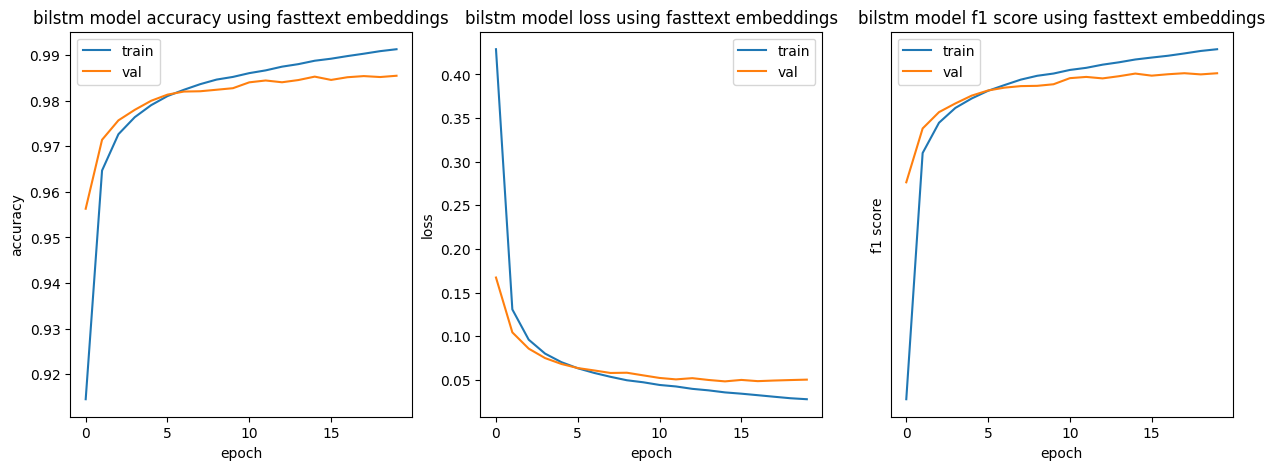

INFO:tensorflow:Assets written to: t1_model4_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t1_model4_fasttext.pkl\assets


#9
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 96, 100)           40100     
                                                                 
 time_distributed_8 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7006228 (26.73 MB)
Trainable params: 42928 (167.69 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 5s 14ms/step - loss: 0.4785 - accuracy: 0.9031 - precision_8: 0.9416 - recall_8: 0.8519 - val_loss: 0.2893 - val_accuracy: 0.9321 - val_precision_8: 0.

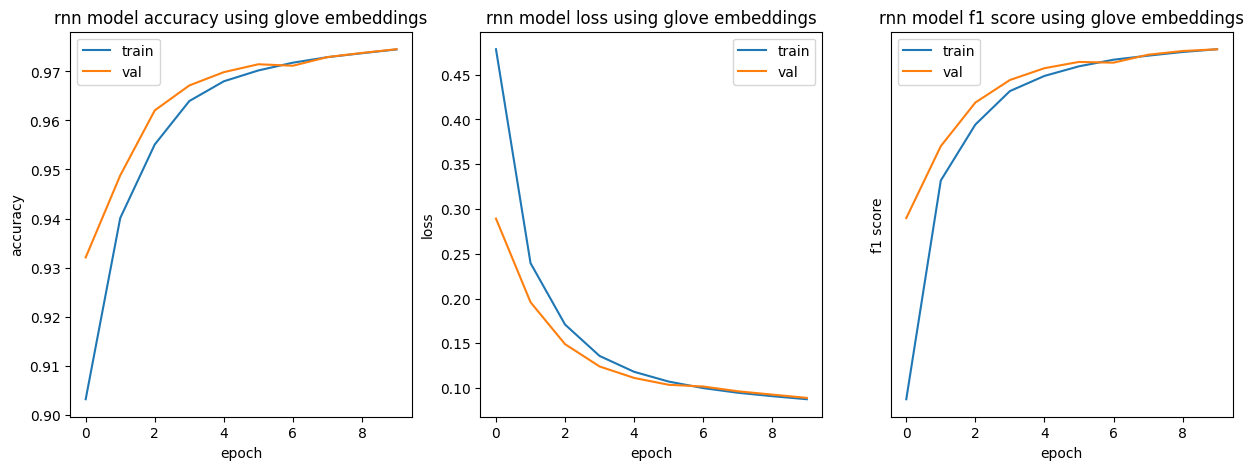

INFO:tensorflow:Assets written to: t1_model1_glove.pkl\assets


INFO:tensorflow:Assets written to: t1_model1_glove.pkl\assets


#10
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 96, 300)           6963300   
                                                                 
 lstm_4 (LSTM)               (None, 96, 100)           160400    
                                                                 
 time_distributed_9 (TimeDi  (None, 96, 28)            2828      
 stributed)                                                      
                                                                 
Total params: 7126528 (27.19 MB)
Trainable params: 163228 (637.61 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 10s 33ms/step - loss: 0.5459 - accuracy: 0.8930 - precision_9: 0.9443 - recall_9: 0.8197 - val_loss: 0.2514 - val_accuracy: 0.9404 - val_precision_9:

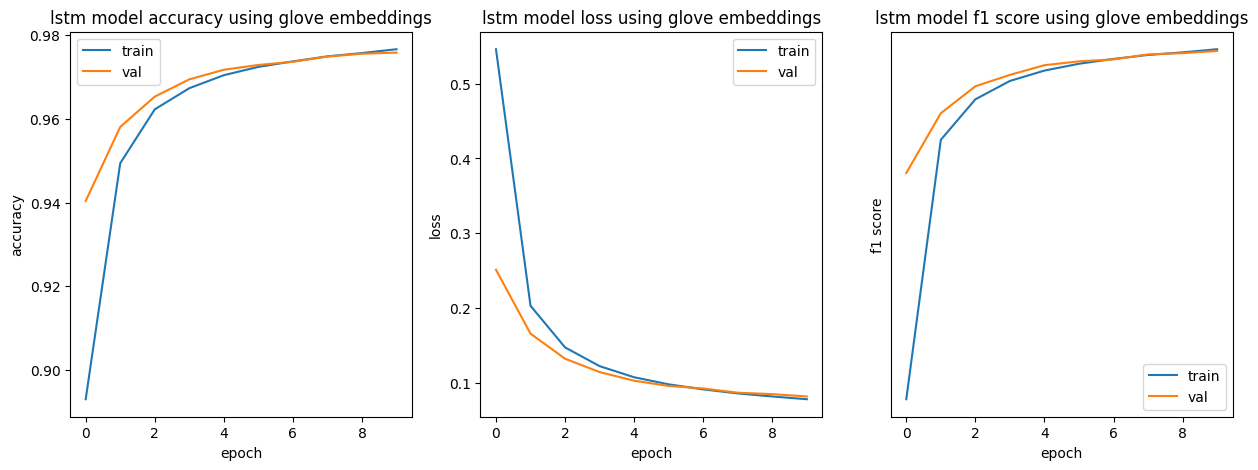

INFO:tensorflow:Assets written to: t1_model2_glove.pkl\assets


INFO:tensorflow:Assets written to: t1_model2_glove.pkl\assets


#11
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 96, 300)           6963300   
                                                                 
 gru_2 (GRU)                 (None, 96, 100)           120600    
                                                                 
 time_distributed_10 (TimeD  (None, 96, 28)            2828      
 istributed)                                                     
                                                                 
Total params: 7086728 (27.03 MB)
Trainable params: 123428 (482.14 KB)
Non-trainable params: 6963300 (26.56 MB)
_________________________________________________________________
Epoch 1/10
251/251 [==============================] - 9s 29ms/step - loss: 0.5609 - accuracy: 0.9216 - precision_10: 0.9553 - recall_10: 0.8222 - val_loss: 0.2287 - val_accuracy: 0.9425 - val_precision_

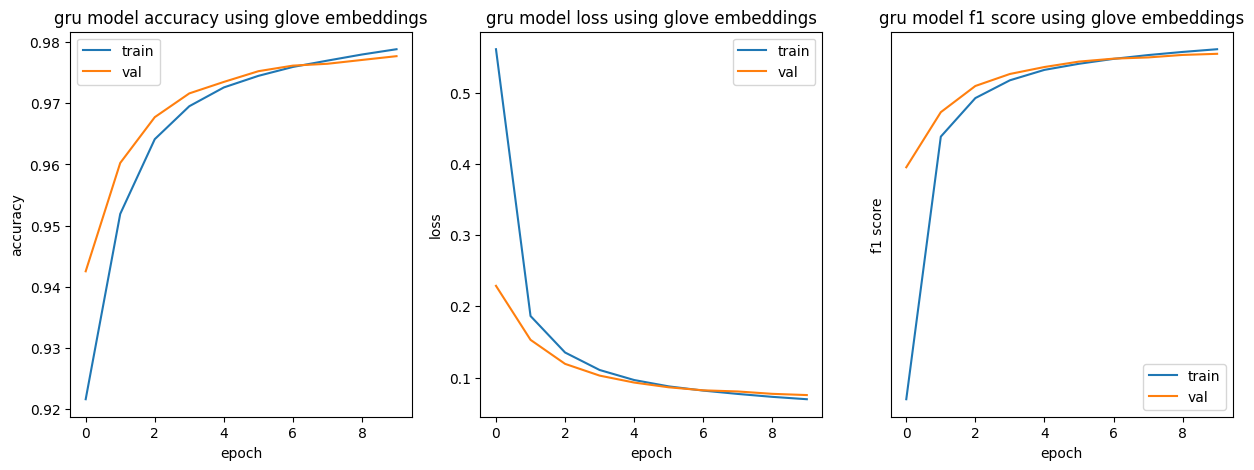

INFO:tensorflow:Assets written to: t1_model3_glove.pkl\assets


INFO:tensorflow:Assets written to: t1_model3_glove.pkl\assets


#12
Epoch 1/20
251/251 [==============================] - 13s 41ms/step - loss: 0.4544 - accuracy: 0.9104 - precision_11: 0.9514 - recall_11: 0.8615 - val_loss: 0.1787 - val_accuracy: 0.9509 - val_precision_11: 0.9790 - val_recall_11: 0.9349
Epoch 2/20
251/251 [==============================] - 9s 37ms/step - loss: 0.1367 - accuracy: 0.9629 - precision_11: 0.9835 - recall_11: 0.9488 - val_loss: 0.1081 - val_accuracy: 0.9701 - val_precision_11: 0.9860 - val_recall_11: 0.9573
Epoch 3/20
251/251 [==============================] - 10s 41ms/step - loss: 0.0954 - accuracy: 0.9731 - precision_11: 0.9865 - recall_11: 0.9628 - val_loss: 0.0866 - val_accuracy: 0.9746 - val_precision_11: 0.9851 - val_recall_11: 0.9664
Epoch 4/20
251/251 [==============================] - 9s 38ms/step - loss: 0.0788 - accuracy: 0.9770 - precision_11: 0.9872 - recall_11: 0.9690 - val_loss: 0.0743 - val_accuracy: 0.9782 - val_precision_11: 0.9869 - val_recall_11: 0.9712
Epoch 5/20
251/251 [==========================

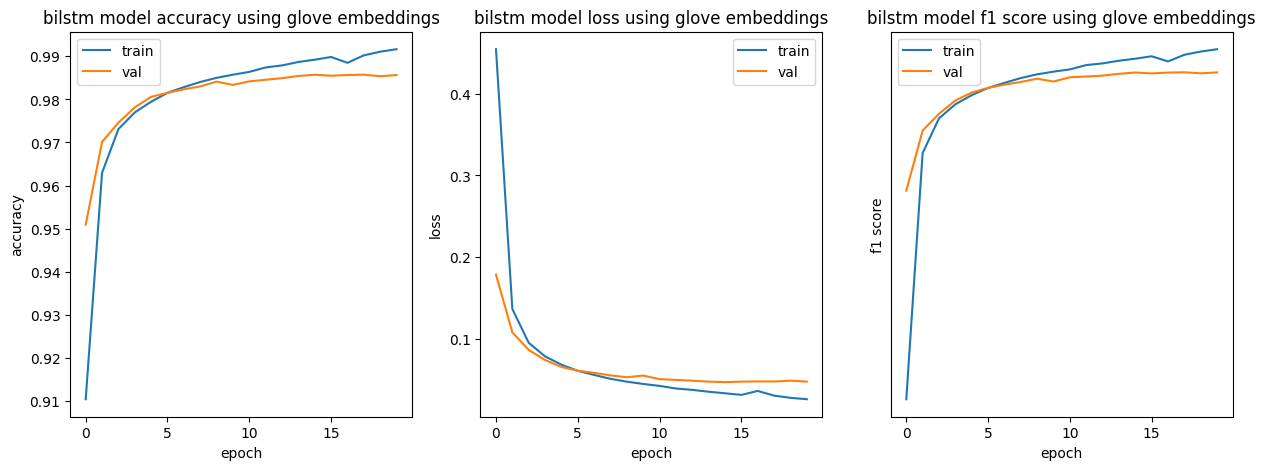

INFO:tensorflow:Assets written to: t1_model4_glove.pkl\assets


INFO:tensorflow:Assets written to: t1_model4_glove.pkl\assets


In [37]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


clear_session()


def build_model(str, num_classes, embedding_matrix):

    global max_length

    if str == 'bilstm':
        model  = Sequential()
        model.add(
            Embedding(
                input_dim=embedding_matrix.shape[0], 
                output_dim=embedding_matrix.shape[1], 
                input_length=max_length, 
                weights=[embedding_matrix], 
                trainable=False))
        model.add(Bidirectional(LSTM(100, return_sequences=True)))
        model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy' ,
                      metrics=['accuracy' , Precision() , Recall()]
                      )
        return model
        
    else: 
        model = Sequential()
        model.add(
            Embedding(
                input_dim=embedding_matrix.shape[0], 
                output_dim=embedding_matrix.shape[1], 
                input_length=max_length, 
                weights=[embedding_matrix], 
                trainable=False
                )
            )
        
        if str == 'rnn':
            model.add(SimpleRNN(100, return_sequences=True))
        elif str == 'lstm':
            model.add(LSTM(100, return_sequences=True))
        elif str == 'gru':
            model.add(GRU(100, return_sequences=True))
        
        model.add(
            TimeDistributed(
                Dense(
                    num_classes, 
                    activation='softmax'
                    )
                )
            )
        
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy' , 
                      metrics=['accuracy' , Precision() , Recall()]
                      )
        model.summary()
        return model

max_length = max_sentence_length

embeddings = {
    'word2vec': embedding_matrix_w2v,
    'fasttext': embedding_matrix_fasttext,
    'glove': embedding_matrix_glove
}

num = 1
i_graph = 0 

for embedding_name, embedding_matrix in embeddings.items():
    for model_type in ['rnn', 'lstm', 'gru','bilstm']:
        print(f'#{num}')
        num+=1
        model = build_model(model_type, len(labels), embedding_matrix)
        if model_type == 'bilstm':
            p = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)
        else:
            p = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)
        y_pred_val = model.predict(x_val).argmax(axis=-1)
        y_true_val = y_val.argmax(axis=-1)

        y_true_train = y_train.argmax(axis=-1)
        y_pred_train = model.predict(x_train).argmax(axis=-1)

        plot_graph(p , embedding_name , model_type , i_graph)

        # model.save(f"task1_{model_type}_{embedding_name}.pkl")

        if model_type == 'rnn':
            model.save(f"t1_model1_{embedding_name}.pkl")
        elif model_type == 'lstm':
            model.save(f"t1_model2_{embedding_name}.pkl")
        elif model_type == 'gru':
            model.save(f"t1_model3_{embedding_name}.pkl")
        else:
            model.save(f"t1_model4_{embedding_name}.pkl")


        i_graph +=1

In [38]:
task1_models_dict = {
    "RNN , Word2Vec" : "t1_model1_word2vec.pkl" , "RNN , GloVe" : "t1_model1_glove.pkl" , "RNN , FastText" : "t1_model1_fasttext.pkl" ,
    "LSTM , Word2Vec" : "t1_model2_word2vec.pkl" , "LSTM , GloVe" : "t1_model2_glove.pkl" , "LSTM , FastText" : "t1_model2_fasttext.pkl" ,
    "GRU , Word2Vec" : "t1_model3_word2vec.pkl" , "GRU , GloVe" : "t1_model3_glove.pkl" , "GRU , FastText" : "t1_model3_fasttext.pkl" , 
    "BiLSTM , Word2Vec" : "t1_model4_word2vec.pkl" , "BiLSTM , GloVe" : "t1_model4_glove.pkl" , "BiLSTM , FastText" : "t1_model4_fasttext.pkl"
}

In [39]:
from keras.models import load_model

results = []

for model_type , model_name in task1_models_dict.items():
    model = load_model(model_name)
    accuracy = model.evaluate(x_test , y_test , verbose=0)
    y_pred_test = model.predict(x_test).argmax(axis=-1)
    y_true_test = y_test.argmax(axis=-1)
    f1_test = f1_score(y_true_test.flatten(), y_pred_test.flatten(), average='macro')
    results.append(f"{model_type} - Test accuracy: {accuracy[1]} - Macro F1: {f1_test}")

30/30 [==============================] - 1s 13ms/step


In [40]:
print("RESULTS FOR TASK-1")

for result in results:
    print(result)

RESULTS FOR TASK-1
RNN , Word2Vec - Test accuracy: 0.952263355255127 - Macro F1: 0.49989753746823395
RNN , GloVe - Test accuracy: 0.9718673229217529 - Macro F1: 0.5203911125428325
RNN , FastText - Test accuracy: 0.9722954034805298 - Macro F1: 0.5400026806171008
LSTM , Word2Vec - Test accuracy: 0.9615604281425476 - Macro F1: 0.6111662576194354
LSTM , GloVe - Test accuracy: 0.9741723537445068 - Macro F1: 0.5422426663992475
LSTM , FastText - Test accuracy: 0.9732064604759216 - Macro F1: 0.5356367228482181
GRU , Word2Vec - Test accuracy: 0.9638984203338623 - Macro F1: 0.6450631351969754
GRU , GloVe - Test accuracy: 0.975588321685791 - Macro F1: 0.586641436748892
GRU , FastText - Test accuracy: 0.9741723537445068 - Macro F1: 0.5611531893294935
BiLSTM , Word2Vec - Test accuracy: 0.9808899760246277 - Macro F1: 0.7615969194253047
BiLSTM , GloVe - Test accuracy: 0.9833157658576965 - Macro F1: 0.7413868913900855
BiLSTM , FastText - Test accuracy: 0.9844463467597961 - Macro F1: 0.7194714639177093

REMANINING DELIVERABLES

In [41]:
labels

['B_CASE_NUMBER',
 'B_COURT',
 'B_DATE',
 'B_GPE',
 'B_JUDGE',
 'B_ORG',
 'B_OTHER_PERSON',
 'B_PETITIONER',
 'B_PRECEDENT',
 'B_PROVISION',
 'B_RESPONDENT',
 'B_STATUTE',
 'B_WITNESS',
 'I_CASE_NUMBER',
 'I_COURT',
 'I_DATE',
 'I_GPE',
 'I_JUDGE',
 'I_ORG',
 'I_OTHER_PERSON',
 'I_PETITIONER',
 'I_PRECEDENT',
 'I_PROVISION',
 'I_RESPONDENT',
 'I_STATUTE',
 'I_WITNESS',
 'O',
 'UNKNNOWN']

30/30 [==============================] - 1s 14ms/step


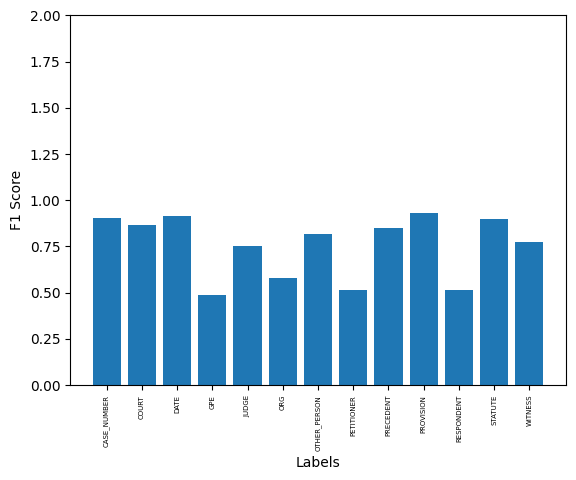

In [44]:
'''

Calculate the label-wise F1 scores (for 13 labels) on test data of Dataset_1 using the
best-performing model. Plot a bar graph or pie chart for this using code. (2 marks)

'''


model = load_model("t1_model4_word2vec.pkl")
y_pred_test = model.predict(x_test).argmax(axis=-1)
y_true_test = y_test.argmax(axis=-1)


f1_scores = f1_score(y_true_test.flatten(), y_pred_test.flatten(), average=None)


labels_ = labels[:-1]

dict_f1 = {
    "CASE_NUMBER" : 0 
    , "COURT" : 0
    , "DATE" : 0
    , "GPE" : 0
    , "JUDGE" : 0
    , "ORG" : 0
    , "OTHER_PERSON" : 0
    , "PETITIONER" : 0
    , "PRECEDENT" : 0
    , "PROVISION" : 0
    , "RESPONDENT" : 0
    , "STATUTE" : 0
    , "WITNESS" : 0
}

for i in range(len(labels_)-1):
    str = labels_[i]
    str = str[2:]
    if dict_f1[str] == 0:
        dict_f1[str] = f1_scores[i]
    else:
        dict_f1[str] = (dict_f1[str] + f1_scores[i])/2

plt.bar(dict_f1.keys() , dict_f1.values())
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.xticks(rotation=90  , fontsize=5)
plt.ylim(0,2)
plt.show()

In [ ]:
# BiLSTM CRF

In [58]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense
from tensorflow.keras.models import Model
from tf2crf import CRF, ModelWithCRFLoss


y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_w2v])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Word2VEc - Test accuracy: {accuracy} - Macro F1: {f1}")



Epoch 1/10
251/251 [==============================] - 38s 133ms/step - loss: 40.7735 - accuracy: 0.9078 - val_loss_val: 14.1863 - val_val_accuracy: 0.9600
Epoch 2/10
251/251 [==============================] - 32s 126ms/step - loss: 9.9703 - accuracy: 0.9723 - val_loss_val: 8.0321 - val_val_accuracy: 0.9770
Epoch 3/10
251/251 [==============================] - 34s 137ms/step - loss: 5.2741 - accuracy: 0.9841 - val_loss_val: 5.9205 - val_val_accuracy: 0.9812
Epoch 4/10
251/251 [==============================] - 34s 134ms/step - loss: 3.0492 - accuracy: 0.9902 - val_loss_val: 5.0829 - val_val_accuracy: 0.9837
Epoch 5/10
251/251 [==============================] - 34s 138ms/step - loss: 1.8656 - accuracy: 0.9940 - val_loss_val: 5.1660 - val_val_accuracy: 0.9833
Epoch 6/10
251/251 [==============================] - 31s 125ms/step - loss: 1.2265 - accuracy: 0.9961 - val_loss_val: 5.1950 - val_val_accuracy: 0.9841
Epoch 7/10
251/251 [==============================] - 35s 141ms/step - loss: 0.8

INFO:tensorflow:Assets written to: t1_model5_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t1_model5_word2vec.pkl\assets


In [59]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_glove])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Glove - Test accuracy: {accuracy} - Macro F1: {f1}")


Epoch 1/10
251/251 [==============================] - 40s 139ms/step - loss: 44.1734 - accuracy: 0.9006 - val_loss_val: 15.7562 - val_val_accuracy: 0.9585
Epoch 2/10
251/251 [==============================] - 33s 131ms/step - loss: 10.6076 - accuracy: 0.9702 - val_loss_val: 7.8924 - val_val_accuracy: 0.9770
Epoch 3/10
251/251 [==============================] - 28s 112ms/step - loss: 5.1427 - accuracy: 0.9843 - val_loss_val: 6.1317 - val_val_accuracy: 0.9811
Epoch 4/10
251/251 [==============================] - 27s 109ms/step - loss: 3.0065 - accuracy: 0.9904 - val_loss_val: 5.2930 - val_val_accuracy: 0.9831
Epoch 5/10
251/251 [==============================] - 28s 112ms/step - loss: 1.9285 - accuracy: 0.9940 - val_loss_val: 5.2454 - val_val_accuracy: 0.9832
Epoch 6/10
251/251 [==============================] - 31s 123ms/step - loss: 1.2727 - accuracy: 0.9960 - val_loss_val: 5.4114 - val_val_accuracy: 0.9837
Epoch 7/10
251/251 [==============================] - 31s 124ms/step - loss: 0.

INFO:tensorflow:Assets written to: t1_model5_glove.pkl\assets


INFO:tensorflow:Assets written to: t1_model5_glove.pkl\assets


In [60]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_fasttext])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Fasttext - Test accuracy: {accuracy} - Macro F1: {f1}")


Epoch 1/10
251/251 [==============================] - 36s 127ms/step - loss: 38.4574 - accuracy: 0.9129 - val_loss_val: 14.2842 - val_val_accuracy: 0.9610
Epoch 2/10
251/251 [==============================] - 28s 112ms/step - loss: 9.1608 - accuracy: 0.9740 - val_loss_val: 7.2787 - val_val_accuracy: 0.9783
Epoch 3/10
251/251 [==============================] - 25s 100ms/step - loss: 4.5143 - accuracy: 0.9859 - val_loss_val: 5.8693 - val_val_accuracy: 0.9813
Epoch 4/10
251/251 [==============================] - 26s 102ms/step - loss: 2.6129 - accuracy: 0.9917 - val_loss_val: 5.3056 - val_val_accuracy: 0.9836
Epoch 5/10
251/251 [==============================] - 27s 108ms/step - loss: 1.6442 - accuracy: 0.9951 - val_loss_val: 5.2071 - val_val_accuracy: 0.9837
Epoch 6/10
251/251 [==============================] - 29s 114ms/step - loss: 1.0915 - accuracy: 0.9967 - val_loss_val: 5.5965 - val_val_accuracy: 0.9832
Epoch 7/10
251/251 [==============================] - 34s 134ms/step - loss: 0.7

INFO:tensorflow:Assets written to: t1_model5_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t1_model5_fasttext.pkl\assets
